# Machine Learning Pipeline - Data Analysis (Henry's comments)

In the following notebooks, we will go through the implementation of each of the steps in the Machine Learning Pipeline. 

We will discuss:

1. **Data Analysis**
2. Feature Engineering
3. Feature Selection
4. Model Training
5. Obtaining Predictions / Scoring


We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). See below for more details.



## Predicting Sale Price of Houses

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses.


### Why is this important? 

Predicting house prices is useful to identify fruitful investments or to determine whether the price advertised for a house is over or under-estimated.


### What is the objective of the machine learning model?

We aim to minimise the difference between the real price and the price estimated by our model. We will evaluate model performance with the:

1. mean squared error (mse, aka SSR/n, aka $\frac{\sum(y_i-\hat{y_i})^2}{n-1})$
2. sqrt of the mean squared error (rmse,aka SER)
3. r-squared (r2).

### How do I download the dataset?

**Instructions also in the lecture "Download Dataset" in section 1 of the course**

- Visit the [Kaggle Website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

- Remember to **log in**.

- Scroll down to the bottom of the page, and click on the link **'train.csv'**, and then click the 'download' blue button towards the right of the screen, to download the dataset.

- The download the file called **'test.csv'** and save it in the directory with the notebooks.



**Note the following:**

-  You need to be logged in to Kaggle in order to download the datasets.
-  You need to accept the terms and conditions of the competition to download the dataset
-  If you save the file to the directory with the jupyter notebook, then you can run the code as it is written here.


In [1]:
import pandas as pd
import numpy as np

'''plotting'''
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

'''stats'''
import scipy.stats as stats

'''additional settings'''
# To display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

# Data Analysis

**We will analyse the following:**

1. Univariate analysis: the target variable
2. Examine the types of variables that exists in the dataset: categorical and numeric
3. Missing data: find the extent of missingness in the datatset
4. Bivariate analysis of variables with missing data 
5. Numerical variables: univariate analysis, transformations and bivariate analysis
6. Categorical variables: Discrete variables
7. Other Categorical variables: cardinality (number of levels of each variable), rare labels, special mappings
8. Additional Reading Resources

Let's go ahead and load the dataset.

In [2]:
# load dataset
data = pd.read_csv('../data/train.csv')

# number of rows and columns of the data
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the train data')

There are 1460 rows and 81 columns in the train data


In [3]:
# drop id, it is just a number given to identify each house
data.drop('Id', axis=1, inplace=True)

data.shape

(1460, 80)

**There are 79 independent variables, and 1 dependent variable (SalePrice).**

In [4]:
# print head
data.head()
data.loc[:5,:]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [5]:
# random sample of 5 observations
data.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
742,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2000,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,108.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1349,1349,GasA,Ex,Y,SBrkr,1349,0,0,1349,0,0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,2000.0,Unf,2,539,TA,TA,Y,120,55,0,0,0,0,NaN,GdPrv,NaN,0,12,2007,WD,Normal,179000
281,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,68.0,Gd,TA,PConc,Gd,TA,No,GLQ,905,Unf,0,357,1262,GasA,Gd,Y,SBrkr,1262,0,0,1262,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2006.0,Fin,2,572,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000
805,20,RL,91.0,12274,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,Stone,256.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1417,1417,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Ex,6,Typ,0,NaN,Attchd,2008.0,RFn,2,554,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,7,2008,New,Partial,227680
1245,80,RL,78.0,12090,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,6,7,1984,2003,Hip,CompShg,VinylSd,VinylSd,BrkFace,74.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,585,585,GasA,Ex,Y,SBrkr,1140,728,0,1868,0,0,3,1,3,1,TA,7,Typ,1,TA,BuiltIn,1984.0,Fin,2,477,TA,TA,Y,268,112,0,0,147,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml,178000
362,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500


In [6]:
# information on column names and column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Comments: notice that a large number of variables are 'objects'-- indicating that they are 

## Target

Let's begin by exploring the target distribution. Note that since SalePrice is continuous, we should plot either the histgoram or kde (pdf) to look at its probability distribution

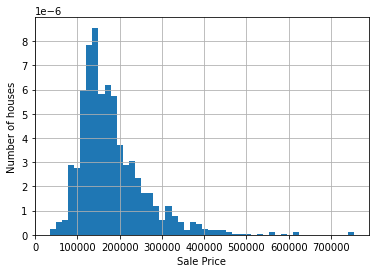

In [7]:
# Histogram to evaluate target variable distribution
data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

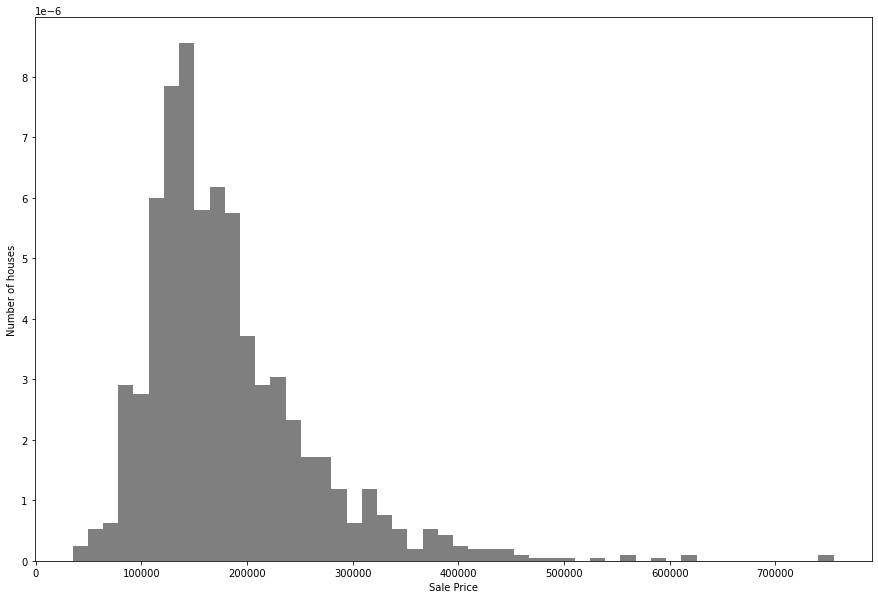

In [8]:
# I can adjust color and transparency of histogram
plt.figure(figsize=(15,10)) 
plt.hist(data['SalePrice'],
         density=True,
         bins=50,
         color='k',
         alpha=0.5);
plt.ylabel('Number of houses');
plt.xlabel('Sale Price');

**The distribution of Sale Price is right skewed (long tail to the right)**
- We might need to perform transformation-- but ONLY do so if I have hetroskedastic error AND nonlinearity (checked by plotting residual u-hat and y-hat (predicted y). Don't perform log(y) if nonlinearity is the ONLY problem (instead, transform the predictors).
- In this example, Udacity log transformed y straight away without checking whether nonlinearity + hetroskedastic error are the problems.
- What we should have done-- specify model, fit model, compute residual and y-hat, plot residual vs y-hat plot, or predictor vs y-hat plot, check for linearity and homoskedasticity, transform variables, fit model again.

Text(0, 0.5, 'Number of houses')

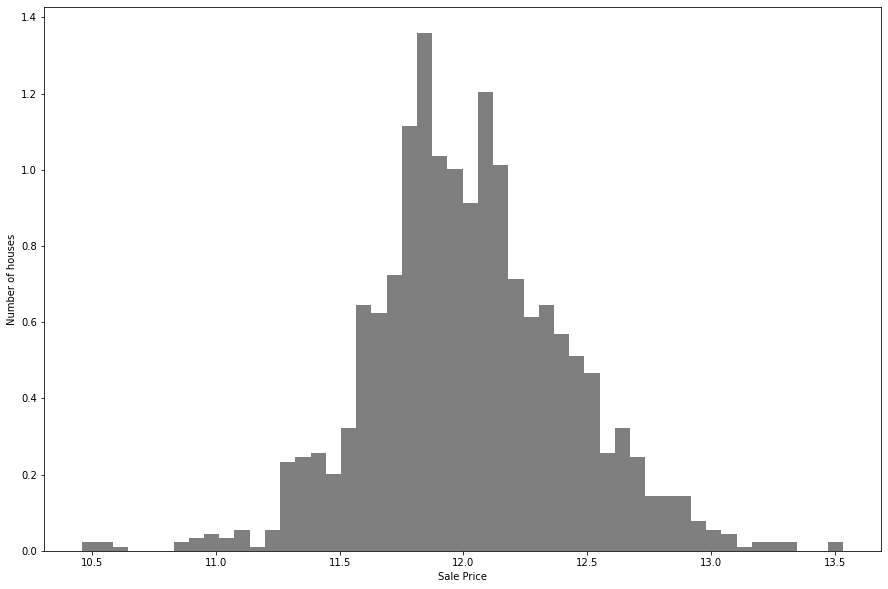

In [9]:
# transform dependent variable: log(y) and then plot histogram
fig = plt.figure(figsize=(15,10))
plt.hist(np.log(data['SalePrice']),
          density=True,
          bins=50,
          color='k',
          alpha=0.5)
plt.xlabel('Sale Price')
plt.ylabel('Number of houses')

**Dependent variable looks more normal after transformation**

## Variable Types

Next, let's identify the categorical and numerical variables in the dataset

In [10]:
# let's identify the categorical variables
# We will capture those of type 'object'

cat_vars = [var for var in data.columns if data[var].dtype=='O']

In [11]:
# alternatively
cat_vars_2= data.select_dtypes(include=['object']).columns.values.tolist()

In [12]:
# MSSubClass is also categorical by definition, despite its numeric values
# (you can find the definitions of the variables in the data_description.txt)

# MSSubClass identifies the type of dwelling involved in the sale. Each level is encoded by a number

data['MSSubClass'].sample(5)

926      60
483     120
1228    120
1335     20
1226     60
Name: MSSubClass, dtype: int64

In [13]:
# lets add MSSubClass to the list of categorical variables
cat_vars = cat_vars + ['MSSubClass']
print(f'In total, there are {len(cat_vars)} categorical variables.')

In total, there are 44 categorical variables.


In [14]:
# I need to cast all cat_vars (including MSSubClass as categorical (type='O')
data[cat_vars] = data[cat_vars].astype('O') 

In [15]:
# numeric variables, excluding the dependent variable
num_vars = [var for var in data.columns if data[var].dtype!='O' and 
            var!='SalePrice']

In [16]:
print(f'There are {len(num_vars)} numeric variables.')

There are 35 numeric variables.


## Missing values
- Let's go ahead and find out the which variables in the dataset contains missing values

In [17]:
# Make a list of the varibales that contain missing values

vars_with_na = [var for var in data.columns if data[var].isnull().sum()>0]

In [18]:
vars_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [19]:
# determine the percentage of missing values and display results in descending order
df_missing = data[vars_with_na].isnull().mean().sort_values(ascending=False)
print(df_missing)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64


- Our dataset contains some variables that have almost all missing values. The top 3 variables has over 90% missing values.
- I need to impute missing value prior to modelling.

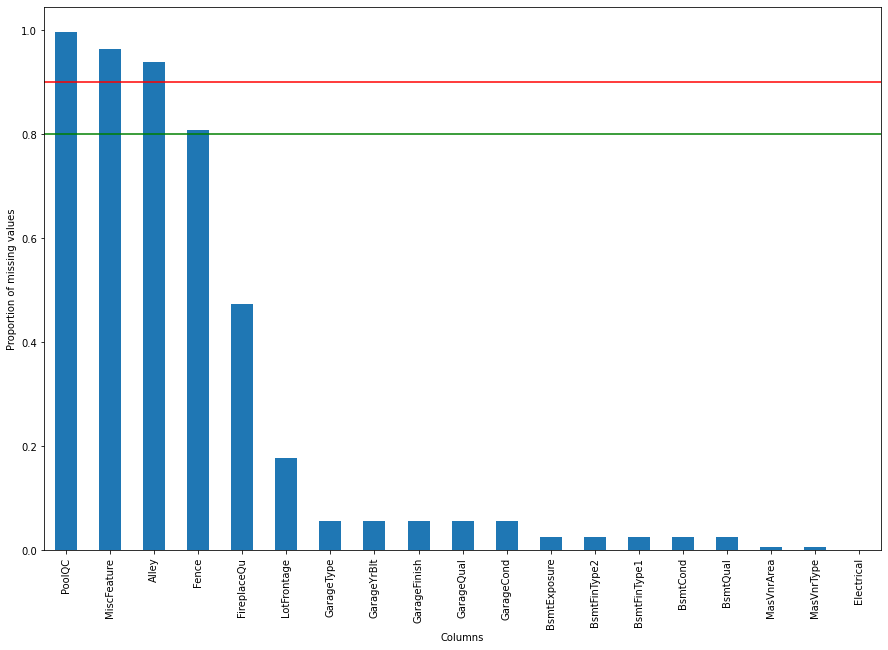

In [20]:
# Visualize missing values with bar plot
fig = plt.figure(figsize=(15,10))
df_missing.plot.bar()
plt.ylabel('Proportion of missing values')
plt.xlabel('Columns')
# add horiztonal line in plot
plt.axhline(y=0.90,color='r',linestyle='-')
plt.axhline(y=0.80,color='g',linestyle='-')

In [21]:
# Alternatively:
df_missing2 = df_missing.copy()
df_missing2=df_missing2.reset_index()
df_missing2.columns=['columns','proportion']

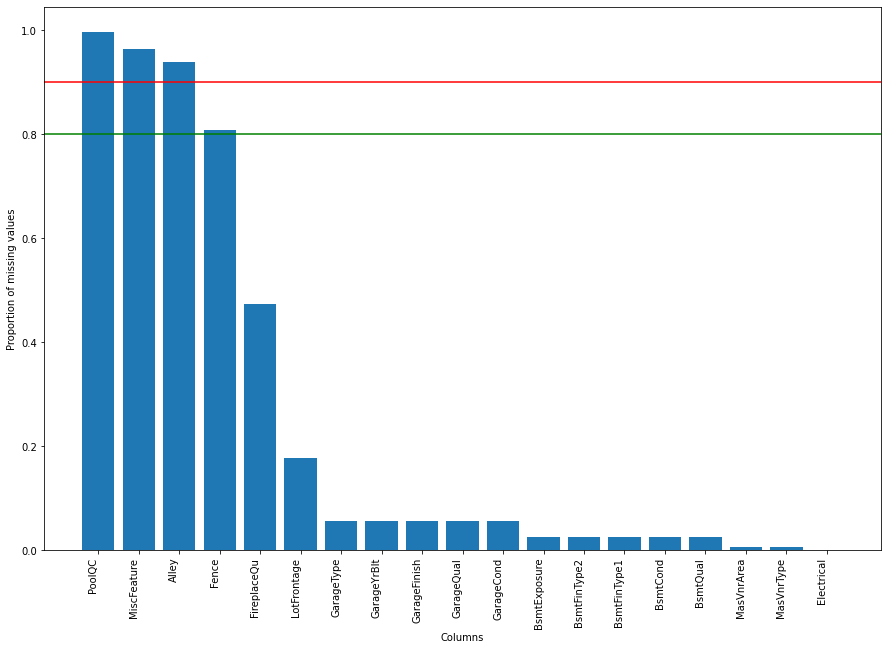

In [22]:
# Visualize missing values with bar plot
fig = plt.figure(figsize=(15,10))
plt.bar(df_missing2['columns'],df_missing2['proportion'])
plt.ylabel('Proportion of missing values')
plt.xlabel('Columns')
# add horiztonal line in plot
plt.axhline(y=0.90,color='r',linestyle='-')
plt.axhline(y=0.80,color='g',linestyle='-')
plt.xticks(rotation=90, ha='right');

In [23]:
# Determine which variables with missing values are categorical, and which are numeric
cat_na = [var for var in vars_with_na if data[var].dtype=='O']
num_na = [var for var in vars_with_na if data[var].dtype!='O']

In [24]:
# alternatively
cat_na2 = [var for var in cat_vars if var in vars_with_na]
num_na2 = [var for var in num_vars if var in vars_with_na]

In [25]:
# Compare two lists
cat_na ==cat_na2

True

In [26]:
num_na==num_na2

True

In [27]:
print("Categorical variables with missing values: \n")
print(cat_na)

Categorical variables with missing values: 

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [28]:
print("Numeric variables with missing values: \n")
print(num_na)

Numeric variables with missing values: 

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


## Bivariate analysis for variables with missing values

**Relationship between missing data and Sale Price**

Let's evaluate the price of the house in those observations where the information is missing. We will do this for each variable that shows missing data.

In [29]:
def analyse_na_value(df,var):
    """compare the mean SalePrice of observations with no missing values and observations with missing values for 
    var. Generate bar plots (with error bars) to visualize the comparison
    
    Args:
    df (Dataframe): input dataframe
    var (str): variable name

    Returns:
        void
    """
        
    # Copy the dataframe so that we don't override the original data
    df = df.copy()
    
    # Replace variable 'var' with 1 for observations that are available, and 0 if missing
    df[var] = np.where(df[var].isnull(),1,0)
    
    # Let's compare the mean SalePrice and stadnard deviation of SalePrice in groups 1 and 0
    tmp = df.groupby(var)['SalePrice'].agg(['mean','std'])
    print(tmp)
    
    # plot bar graph
    plt.figure(figsize=(10,5))
    tmp.plot.barh(y='mean', 
                  legend=False,
                  xerr='std',
                  title='Sale Price',
                  color='green')
    
    plt.show()



                      mean           std
LotFrontage                             
0            180770.480433  83389.519866
1            181620.073359  57841.775706


<Figure size 720x360 with 0 Axes>

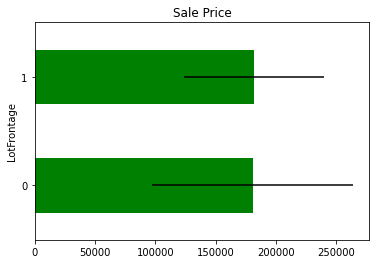

                mean           std
Alley                             
0      142845.912088  42867.137343
1      183452.131483  80667.145180


<Figure size 720x360 with 0 Axes>

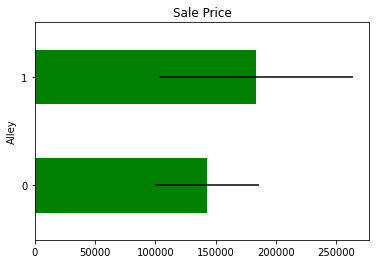

                     mean           std
MasVnrType                             
0           180615.063361  79285.541485
1           236484.250000  93964.474968


<Figure size 720x360 with 0 Axes>

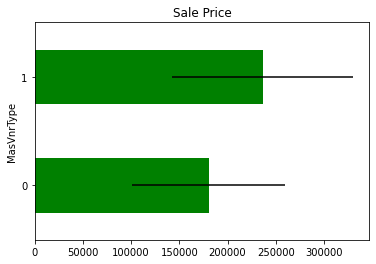

                     mean           std
MasVnrArea                             
0           180615.063361  79285.541485
1           236484.250000  93964.474968


<Figure size 720x360 with 0 Axes>

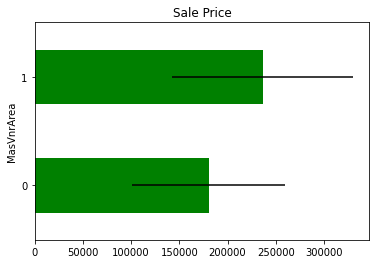

                   mean           std
BsmtQual                             
0         182878.277583  79387.526888
1         105652.891892  29278.694797


<Figure size 720x360 with 0 Axes>

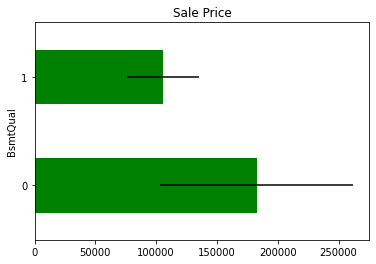

                   mean           std
BsmtCond                             
0         182878.277583  79387.526888
1         105652.891892  29278.694797


<Figure size 720x360 with 0 Axes>

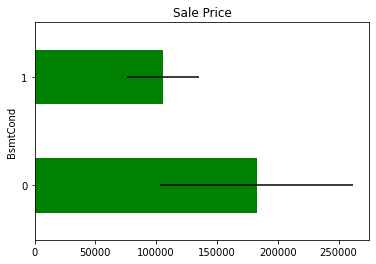

                       mean           std
BsmtExposure                             
0             182871.511252  79415.045187
1             107938.342105  32133.440664


<Figure size 720x360 with 0 Axes>

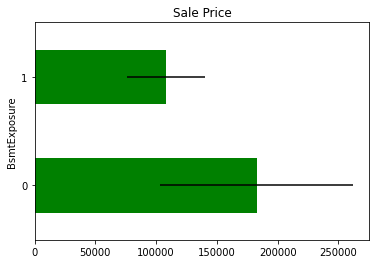

                       mean           std
BsmtFinType1                             
0             182878.277583  79387.526888
1             105652.891892  29278.694797


<Figure size 720x360 with 0 Axes>

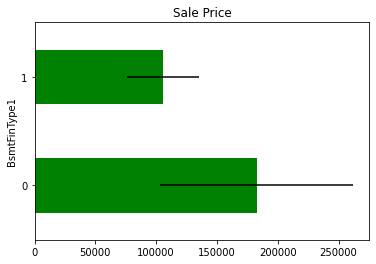

                       mean           std
BsmtFinType2                             
0             182807.165260  79370.104421
1             110346.236842  40879.307312


<Figure size 720x360 with 0 Axes>

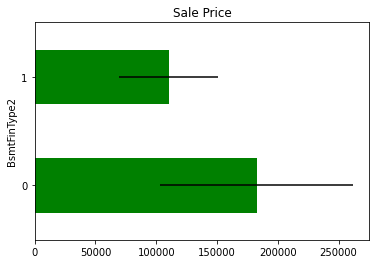

                     mean           std
Electrical                             
0           180930.394791  79468.964025
1           167500.000000           NaN


<Figure size 720x360 with 0 Axes>

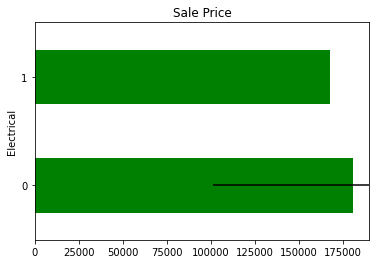

                      mean           std
FireplaceQu                             
0            216397.692208  86843.901262
1            141331.482609  44389.786884


<Figure size 720x360 with 0 Axes>

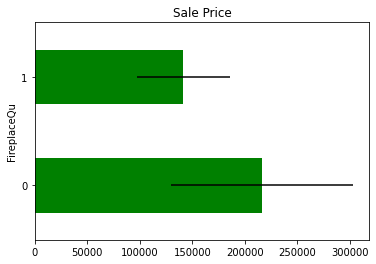

                     mean           std
GarageType                             
0           185479.511240  79023.890600
1           103317.283951  32815.023389


<Figure size 720x360 with 0 Axes>

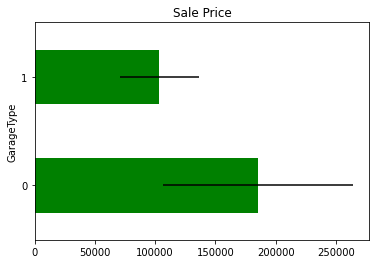

                      mean           std
GarageYrBlt                             
0            185479.511240  79023.890600
1            103317.283951  32815.023389


<Figure size 720x360 with 0 Axes>

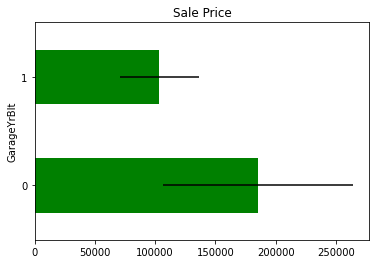

                       mean           std
GarageFinish                             
0             185479.511240  79023.890600
1             103317.283951  32815.023389


<Figure size 720x360 with 0 Axes>

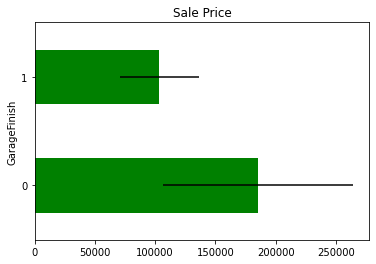

                     mean           std
GarageQual                             
0           185479.511240  79023.890600
1           103317.283951  32815.023389


<Figure size 720x360 with 0 Axes>

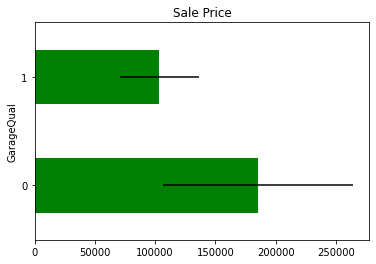

                     mean           std
GarageCond                             
0           185479.511240  79023.890600
1           103317.283951  32815.023389


<Figure size 720x360 with 0 Axes>

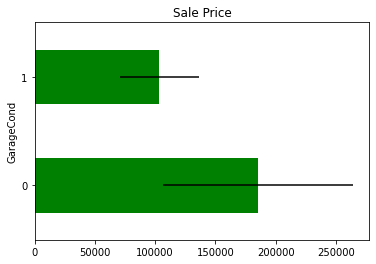

                 mean            std
PoolQC                              
0       288138.571429  206071.850935
1       180404.663455   78168.872519


<Figure size 720x360 with 0 Axes>

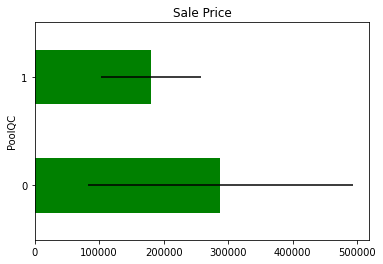

                mean           std
Fence                             
0      152912.007117  62113.736323
1      187596.837998  81656.497075


<Figure size 720x360 with 0 Axes>

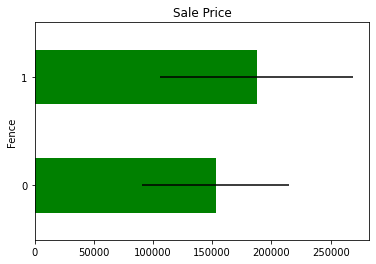

                      mean           std
MiscFeature                             
0            151623.944444  52996.542694
1            182046.410384  80084.136570


<Figure size 720x360 with 0 Axes>

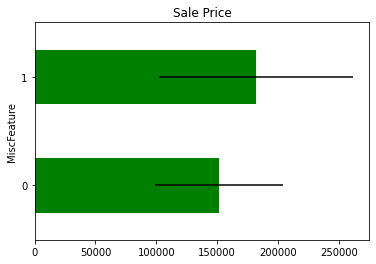

In [30]:
# let's run the function on each variable with missing data

for var in vars_with_na:
    analyse_na_value(data, var)

**Comments:** In some variables, the average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists. This suggests that data being missing could be a good predictor of Sale Price.

## Numeric variables
- Look at values of numeric variables
- Look at "year" variables; engineer new features from year variables and examine their relationships with SalePrice

In [31]:
data.loc[:5,num_vars]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
5,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009


In [32]:
print(f'There are {len(num_vars)} numeric variables in the dataset.')

There are 35 numeric variables in the dataset.


**Temmporal Variables**
- Amongst the numeric variables, there are some variables that has to do with time:
    - YearBuilt: year in which the house was built
    - Year RemodAdd: year in which the house was remodeled
    - GarageYrBlt: year in which a garage was built
    - YrSold: year in which the house was sold
- We generally don't use date variables in their raw format. Instead, we extract information from them as use them as features. For example, we can capture the difference in years between the year the house was built and the year the house was sold and use that as a feature in our model.


In [33]:
# list of variables that contain year information
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [34]:
# Let's explore the values of these year variables
for var in year_vars:
    print(var,'\n',data[var].unique())
    print()

YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt 
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 196

**Comments:** As expected, all values in the "year variables" are years

## Bivariate analysis on Years variables
- Look at the median SalePrice of each YrSold (of each YrBuilt)

In [35]:
data.groupby('YrSold')['SalePrice'].agg('median')

YrSold
2006    163995.0
2007    167000.0
2008    164000.0
2009    162000.0
2010    155000.0
Name: SalePrice, dtype: float64

In [36]:
type(data.groupby('YrSold')['SalePrice'].agg('median'))

pandas.core.series.Series

Line plot: https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html

Text(0, 0.5, 'Median House Price')

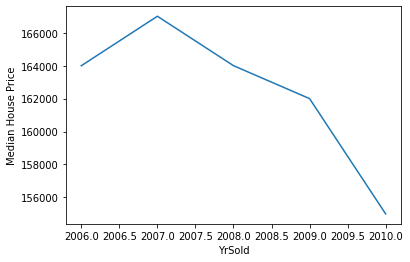

In [37]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

**Comments:** There is a drop in median price of sale from 2006 to 2010. This is strange because the sale price of houses usually increase as years go by.

Text(0, 0.5, 'Median House Price')

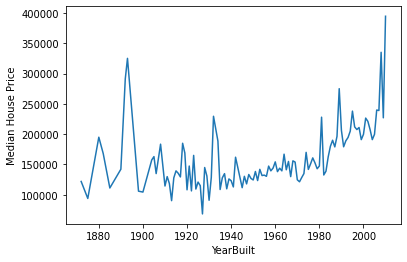

In [38]:
# plot median sale price vs year in which it was built
# Perhaps older houses (say a house built in 1980) sales more less than a newer house that was built in 2004

data.groupby('YearBuilt')['SalePrice'].agg('median').plot()
plt.ylabel('Median House Price')

**Comments:** 
- Newer houses tend to be more expensive (sold at a higher price), especially after 1990.
- If the overall price of sale of houses decrease as years go by, one explanation is that more older houses are being sold as years go by.
- We verify this, we need to capture the elapsed years between a year variable and the year in which it was sold (e.g., Elasped time from the year when the house was built to the year it was sold), and then plot it against the Year it was sold. If there is a positive relationship between the median Elasped time (age of house) and Year Sold, that means on average, houses are older as the years goes by

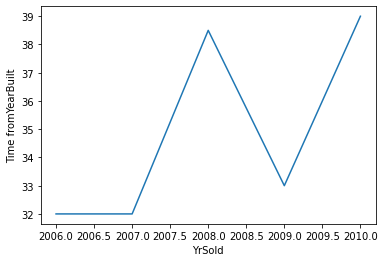

In [39]:
df_tmp = data.copy()
# The elasped time between Year a house is sold and the year it was built
df_tmp['elasped_time'] = df_tmp['YrSold']-df_tmp['YearBuilt']

# Compute the median YearBuilt for each year houses are sold
df_tmp.groupby('YrSold')['elasped_time'].agg('median').plot()
plt.ylabel('Time from' + 'YearBuilt')
plt.show()

**Comments**: There is a large increase in the median age of houses that are sold between 2007-2008. This is followed by a sharp decrease from 2008-2009 (likely due to the 2008 crisis in the housing market, lots of newer foreclosed houses are sold by banks). This is followed by an increase in median age of houses sold between 2009-2010. Prior to 2007, the median age of houses that are sold is 32 years (houses built in 1975)

In [40]:
# Create a function that allow us to perform similar analysis on other Year variables

def analyse_year_vars(df,var):
    """Compute the elasped time (# of years) between 'Year variable' and 'YrSold'.
    Compute the median time of elasped time for each YrSold and then plot the median elasped time against YrSold.
    Args:
    df (Dataframe): input dataframe
    var (str): variable name of Year variable

    Returns:
        void
    """
    # make a copy of input dataframe, this is a common trick that allow us to make any changes  
    # without changing the original input dataframe 
    df=df.copy() 
    
    # compute the elapse time and replace the origianl Year variable-- it's fine since we are 
    # not affecting the original input dataframe
    df[var] = df['YrSold']-df[var]
    
    # Compute the median elapse time for each YrSold, generate line plot
    df.groupby('YrSold')[var].agg('median').plot()
    plt.ylabel('Time from ' + var)
    plt.show()

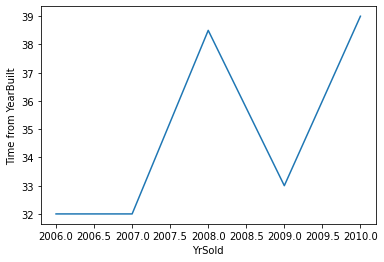

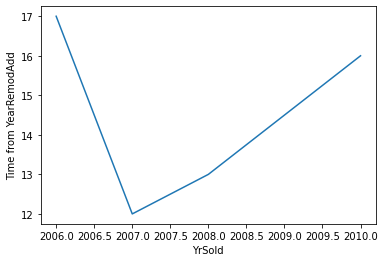

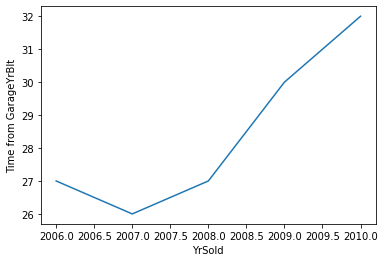

In [41]:
for var in year_vars:
    if var!='YrSold':
        analyse_year_vars(data,var)

In [42]:
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

**Comments**:
- From the plots, we see that towards 2010, the houses sold had older garages, and had not been remodelled recently. 
- Given that older houses tend to sell for cheaper (extrapolate this to older garages and more time since last remodelling, that might explain why we see cheaper sales prices in recent years, at least in this dataset.

To verify this with more descriptive analysis: we can now plot SalePrice vs Time from YearBuilt; SalePrice vs Time from YearRemodAdd, and SalePrice vs Time from GarageYrBlt to see if there is a relationship.

In [43]:
def analyse_year_vars_scatter(df,var):
    """Compute the elasped time (# of years) between 'Year variable' and 'YrSold'. 
    Plot the elasped time vs SalesPrice
    
    Args:
    df (Dataframe): input dataframe
    var (str): variable name of Year variable

    Returns:
        void
    """
    
    df=df.copy() # ensure changes to df would not affect original input dataframe
    
    # compute the elaspe time
    df[var] = df['YrSold'] - df[var]
    
    # scatter plot of SalePrice vs elapse time
    plt.scatter(x=df[var],
                y=df['SalePrice'])
    plt.ylabel('Saleprice')
    plt.xlabel('Elapsed year from ' + var + ' to YrSold')
    plt.show()
    

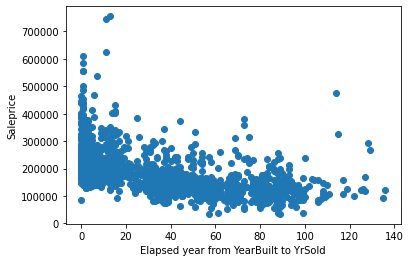

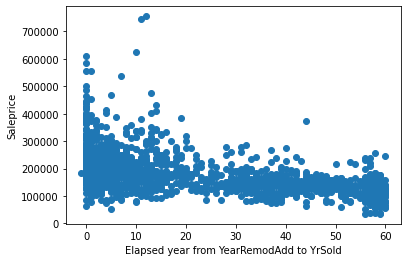

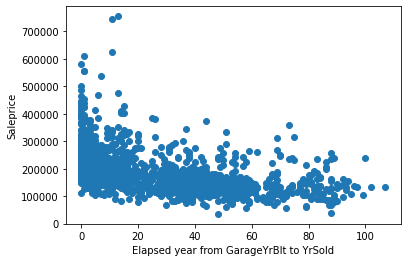

In [44]:
for var in year_vars:
    if var!='YrSold':
        analyse_year_vars_scatter(data,var)

**Comments:**
- There is a negative association between SalePrice and older homes, older garages, and older remodelling. 
- In other words, the longer the time between the house was built or remodeled or garage built and the sale date, the lower the sale Price.

## Other continuous variables (not year variable or SalePrice)
- Univariate analysis: distribution
- Transform variables that are "skewed"
- Bivaraite analysis: plot original/transformed continuous variables against SalePrice

**NOTE: I define continuous variable as:**
- Numeric variables (not dtype 'O')
- Numeric variables with more than 20 unique values
- For numeric variables with less than 20 unique values, I consider it as "Discrete variables" (to be treated like a "ordered" categorical (ordinal) variable)

In [45]:
# Get a list of continuous variables

# get all numeric variables that are not year variables
cont_vars = [var for var in num_vars if var not in year_vars]
# get all numeric variables that have 20 or more unique values
cont_vars = [var for var in cont_vars if len(data[var].unique())>=20]

print(f'The number of continuous variables, excluding year variables is {len(cont_vars)}')

The number of continuous variables, excluding year variables is 18


In [46]:
# Take a look at the continuous variables
data[cont_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


In [47]:
data[cont_vars].sample(5)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
966,130.0,9600,0.0,428,0,300,728,976,332,0,1308,256,0,70,0,0,0,0
610,NaN,11050,204.0,904,0,536,1440,1476,677,0,2153,736,253,142,0,0,0,0
1419,NaN,16381,312.0,1110,0,734,1844,1844,0,0,1844,540,0,73,216,0,0,0
1240,65.0,8158,252.0,550,0,334,884,884,884,0,1768,543,0,63,0,0,0,0
1082,70.0,8749,100.0,0,0,1459,1459,1459,0,0,1459,527,192,39,0,0,0,0


In [48]:
data.loc[:5,cont_vars]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0
5,85.0,14115,0.0,732,0,64,796,796,566,0,1362,480,40,30,0,320,0,700


### Univariate analysis of continuous variables

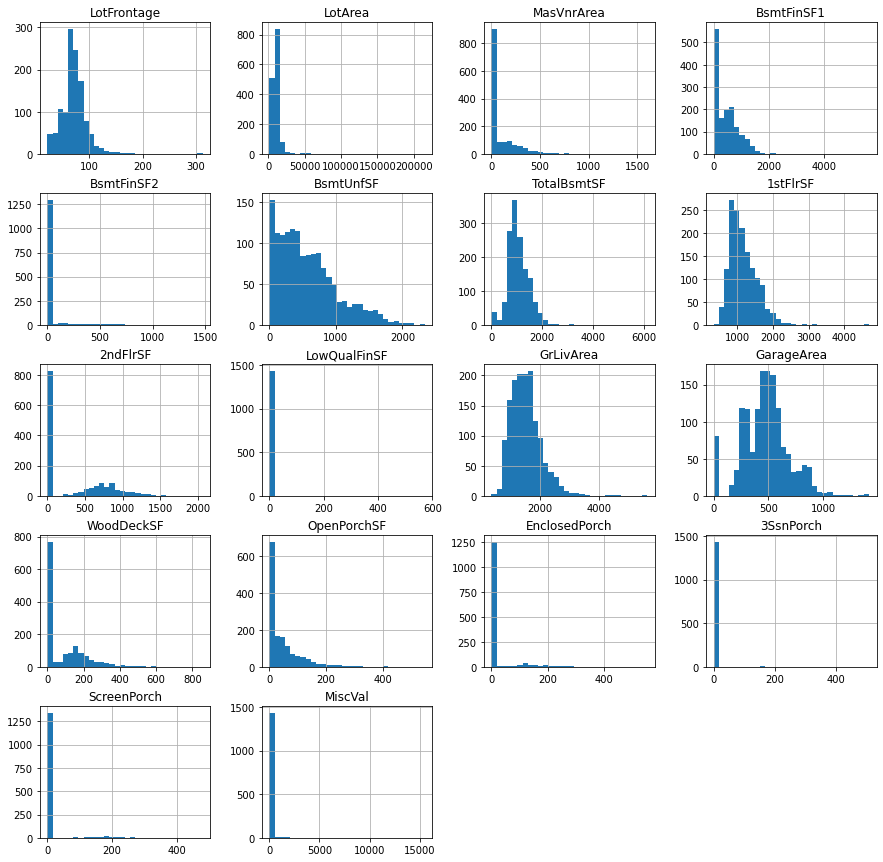

In [49]:
data[cont_vars].hist(bins=30,figsize=(15,15))
plt.show()

- 3SsnPorch, ScreenPorch and MiscVal are extremely skewed
- Apply "Yeo-Johnson transformation to variables like LotFrontage, LotArea, BsmUnfSF
- Apply binary transformation to variables like 3SsnPorch, ScreenPorch and MiscVal.

- But in generla, we transform the predictor when nonlinearity is the ONLY problem, and assumptions related to heteroskedasticity, no perfect multicollinearity and zero conditional mean error hold, and there is no outliers.
- Log transform predictors to make 1) small values that are close together to spread further out, 2) larger values that are more spread out to get closer together.

In [50]:
# A list of very skewed variables, will need binary transformation later
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [51]:
cont_vars = [var for var in cont_vars if var not in skewed]

In [52]:
len(cont_vars)

12

### Apply the Yeo-Johnson Transformation to cont_vars to make them more normal
- use function from scipy.stats

In [53]:
# A temporary copy of data
tmp = data.copy()
for var in cont_vars:
    # apply Yeo-Johnson transformation to variables in cont_vars
    tmp[var],param = stats.yeojohnson(data[var])

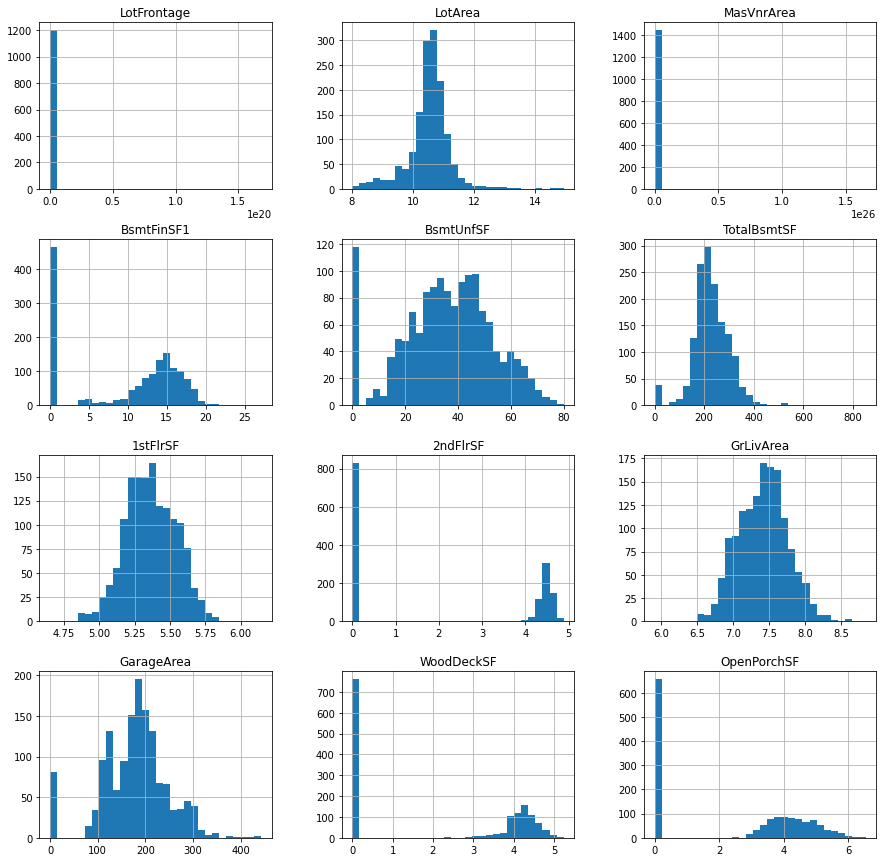

In [54]:
# Plot histogram of the transformed variables (cont_vars)
tmp[cont_vars].hist(bins=30,
                   figsize=(15,15))
plt.show()

**Comments:**
- Transformation did not do much for LotFrontage and MasVnrArea 
- For the others, the values seem to be spread more evenly in the range.
- Whether this helps improve the predictive power, remains to be seen. 
    - To verify: we should train a model with the original values and one with the transformed values, and compare their model performance, and feature importance.
    - I can also visualize compared relationship of original variable and SalePrice, and transformed variable and SalePrice

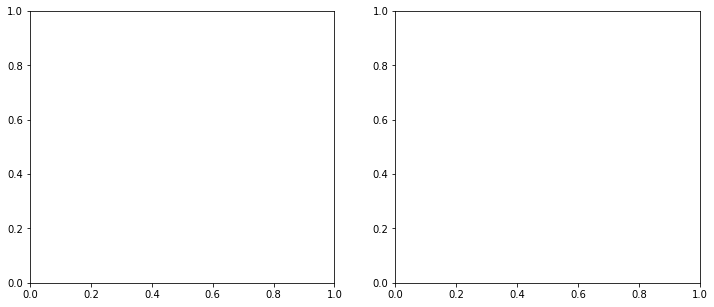

In [55]:
# Plot the original variable vs SalePrice, and the transformed variaable vs SalePrice

var = "LotArea"

fig,axes = plt.subplots(1,2,figsize=(12,5))

In [56]:
type(fig)

matplotlib.figure.Figure

In [57]:
type(axes)

numpy.ndarray

In [58]:
type(axes[0])

matplotlib.axes._subplots.AxesSubplot

Text(0.5, 0, 'Original LotArea')

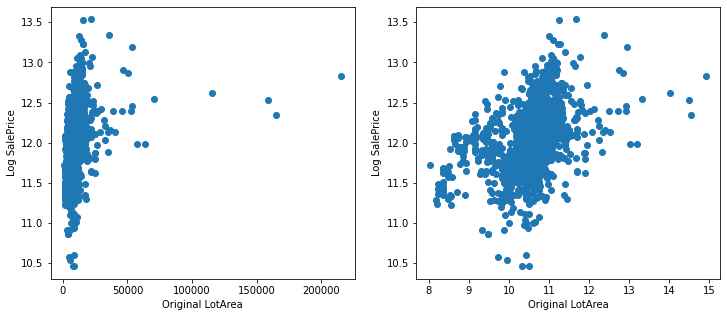

In [59]:
var = "LotArea"
fig,axes = plt.subplots(1,2,figsize=(12,5))

# original variable vs log(SalePrice)
axes[0].scatter(x=data[var],
                y=np.log(data['SalePrice']))
axes[0].set_ylabel('Log SalePrice') # subplot axis object has set_ylabel but no ylabel
axes[0].set_xlabel('Original ' + var)


# transformed variable vs log(SalePrice)
axes[1].scatter(x=tmp[var],
                y=np.log(tmp['SalePrice']))
axes[1].set_ylabel('Log SalePrice') # subplot axis object has set_ylabel but no ylabel
axes[1].set_xlabel('Original ' + var)

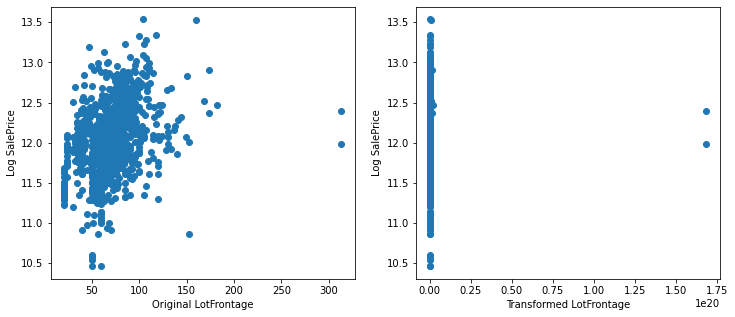

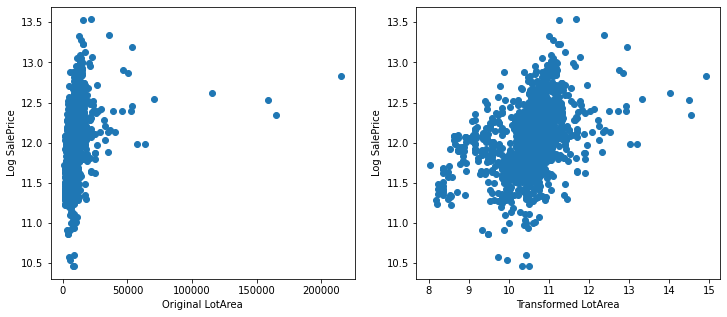

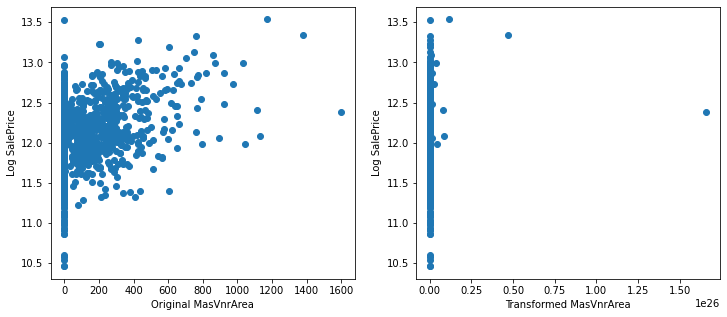

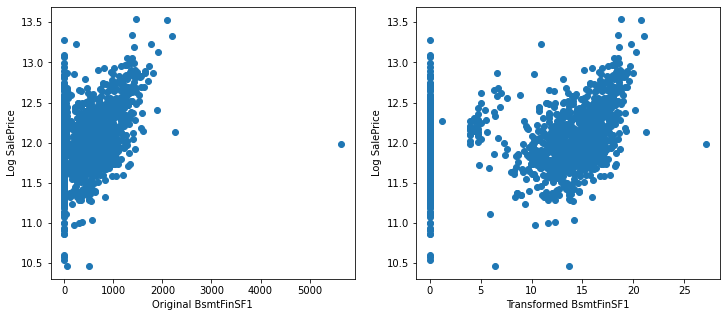

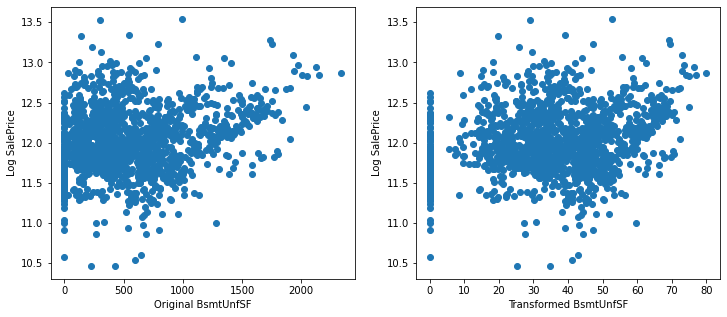

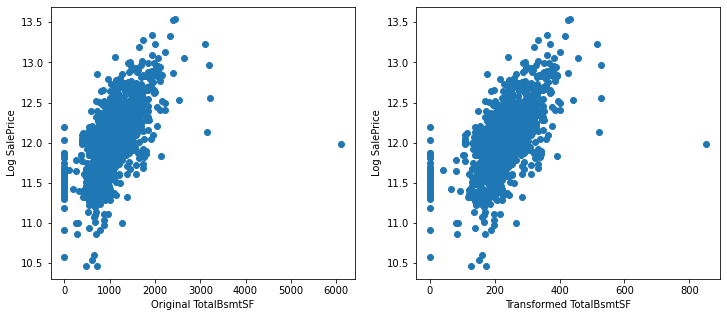

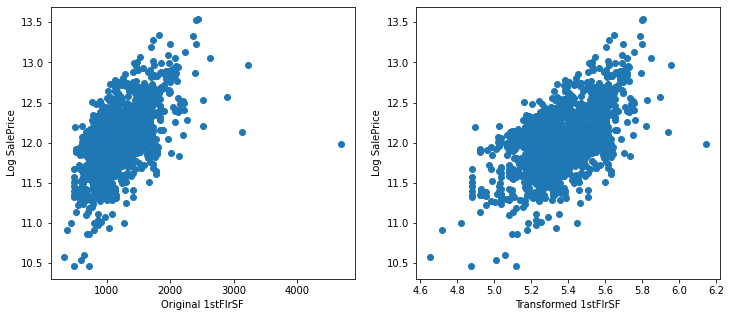

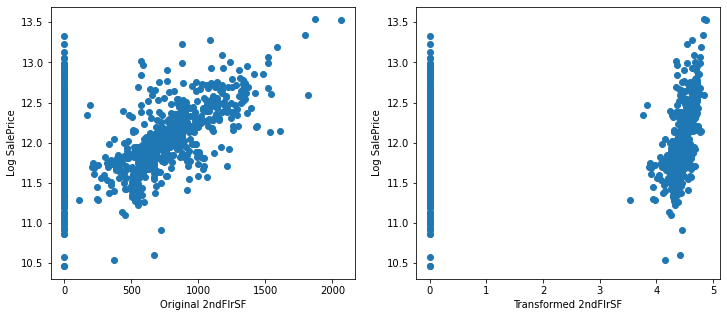

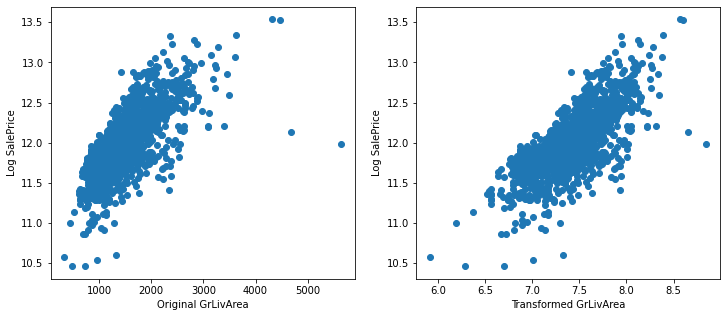

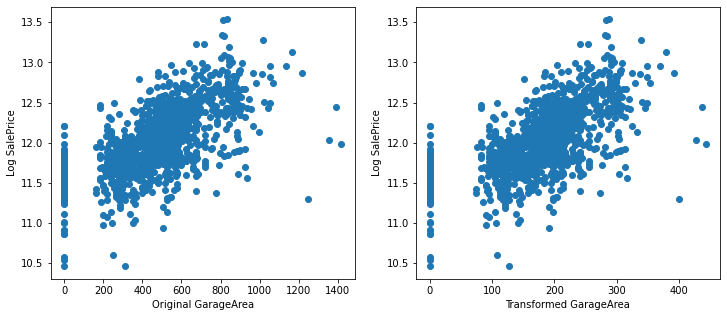

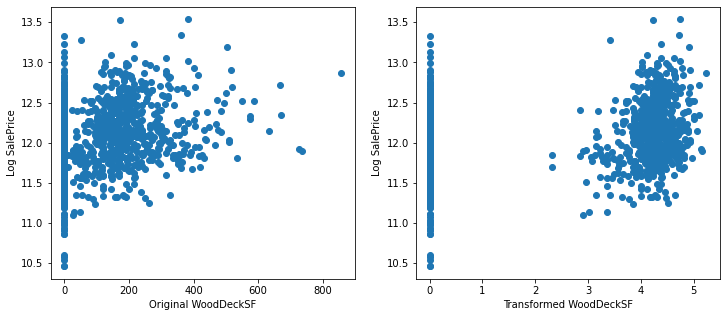

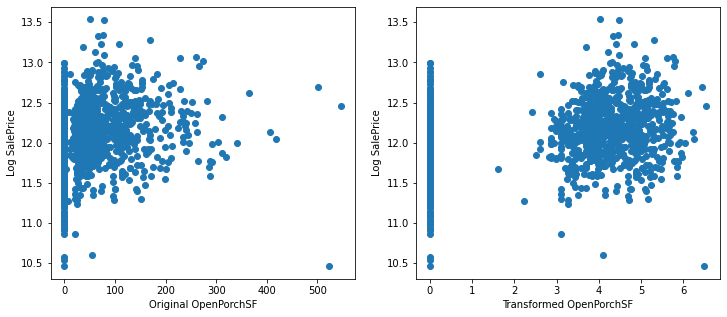

In [60]:
# Generate similar plots for all cont_vars

for var in cont_vars:
    fig,axes = plt.subplots(1,2,figsize=(12,5))

    # original variable vs log(SalePrice)
    axes[0].scatter(x=data[var],
                y=np.log(data['SalePrice']))
    axes[0].set_ylabel('Log SalePrice') # subplot axis object has set_ylabel but no ylabel
    axes[0].set_xlabel('Original ' + var)

    # transformed variable vs log(SalePrice)
    axes[1].scatter(x=tmp[var],
                y=np.log(tmp['SalePrice']))
    axes[1].set_ylabel('Log SalePrice') # subplot axis object has set_ylabel but no ylabel
    axes[1].set_xlabel('Transformed ' + var)
    


Visually, the transformations seems to improve the relationship only for LotArea.

## Log transformation
- Log(X) does not exist if X<=0, so we can only perform log transformation on several variables that have no zeros and positive values only:
    - LotFrontage, 1stFlrSF, and GrLivArea

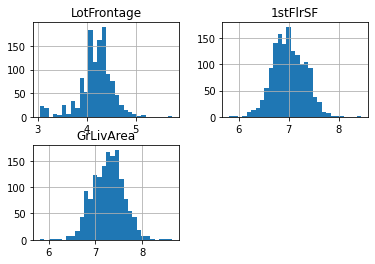

In [61]:
tmp = data.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    # transform the variable with logarithm
    tmp[var] = np.log(data[var])
    
tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30)
plt.show()

Visually, the distribution of these variables are more normal.

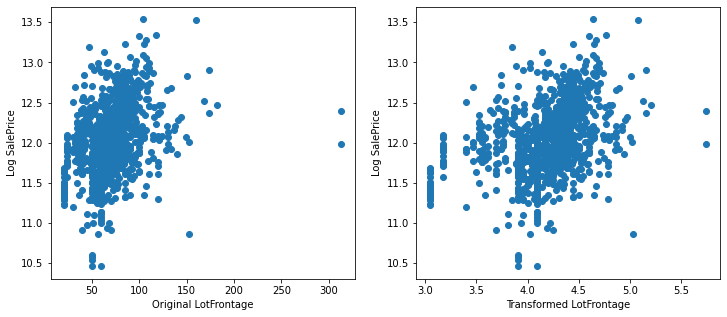

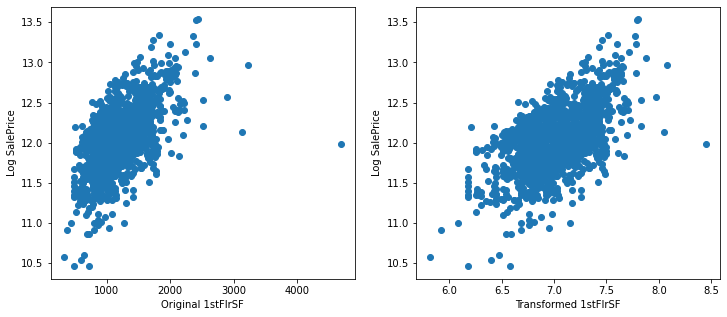

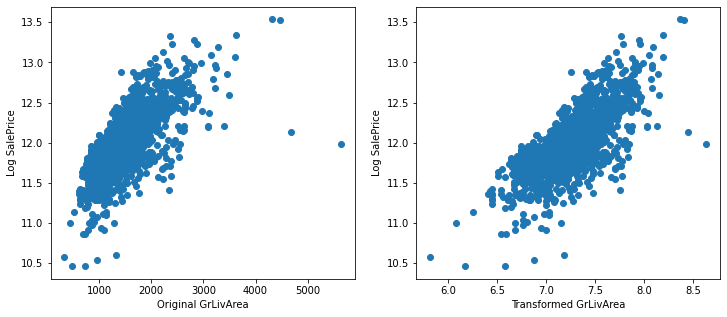

In [62]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    fig,axes = plt.subplots(1,2,figsize=(12,5))

    # original variable vs log(SalePrice)
    axes[0].scatter(x=data[var],
                y=np.log(data['SalePrice']))
    axes[0].set_ylabel('Log SalePrice') # subplot axis object has set_ylabel but no ylabel
    axes[0].set_xlabel('Original ' + var)

    # transformed variable vs log(SalePrice)
    axes[1].scatter(x=tmp[var],
                y=np.log(tmp['SalePrice']))
    axes[1].set_ylabel('Log SalePrice') # subplot axis object has set_ylabel but no ylabel
    axes[1].set_xlabel('Transformed ' + var)
    

The transformed variables have a slightly more linear relationship with log(SalePrice)

## Binary Transformation
- For variables that are very skewed, we can transform them from continuous to binary variables
- Binary transformation simply means for a given variable, set all values with 0 to 0 and all values not 0 to 1.

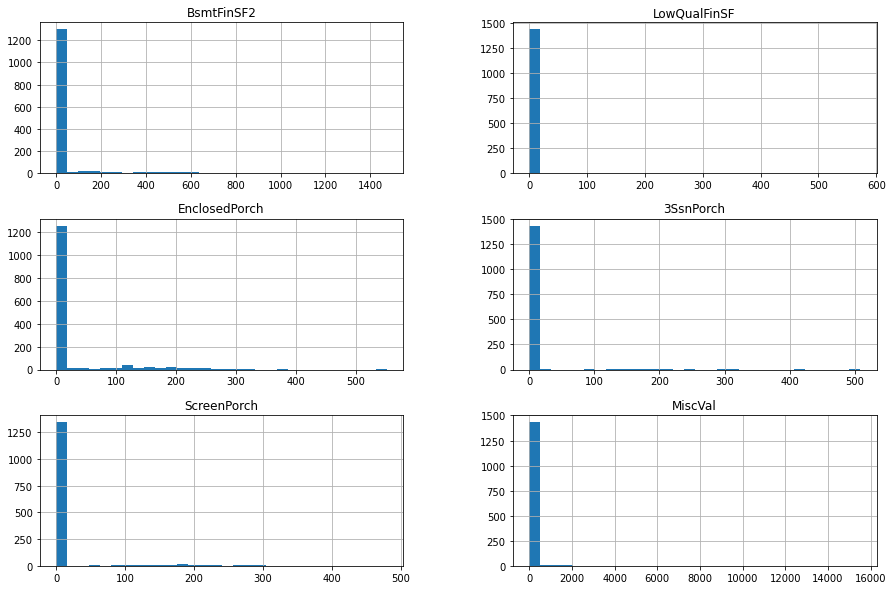

In [63]:
data[skewed].hist(bins=30, figsize=(15,10))
plt.show()

### Perform binary transformation and plot agains SalePrice
- For each variable, compute the mean SalePrice for group 0 and group 1
- Generate bar plots

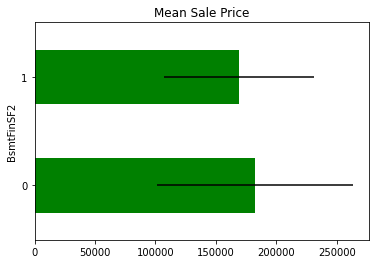

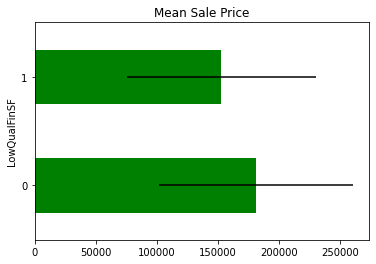

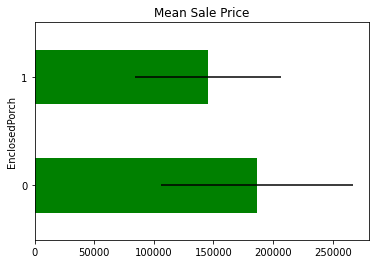

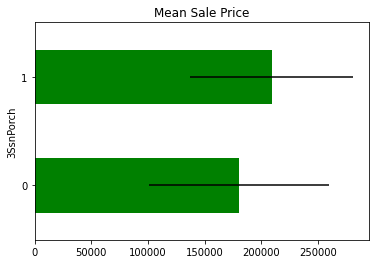

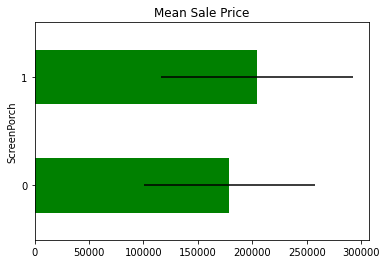

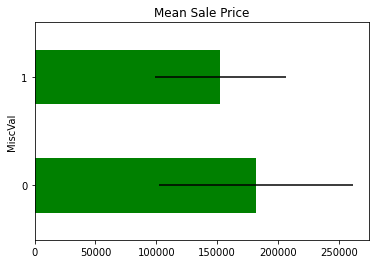

In [64]:
for var in skewed:
    tmp=data.copy()
    
    # map the variable values into 0 and 1 (use np.where)
    tmp[var] = np.where(data[var]==0,0,1)
    
    # determine mean sale price in group 0 and group 1
    df_grpby = tmp.groupby(var)['SalePrice'].agg(['mean','std'])
    
    # generate horiztonal bar graph
    df_grpby.plot(kind='barh',
                 y = 'mean',
                 xerr='std',
                 legend=False,
                 title='Mean Sale Price',
                 color='g')
    
    plt.show()

There seem to be a difference in Sale Price between group 0 and group 1. However, the difference might not be significant.

## Categorical variables: "discrete variables"
- Numeric variables with less than 20 unique values-- we treat these as "ordinal categorical variables"
- Perform Bivariate analysis: boxplot between discrete variable and SalePrice

In [65]:
# A list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique())<20 and var not in year_vars]

print(f'The number of discrete variable is: {len(discrete_vars)}')

The number of discrete variable is: 13


In [66]:
data[discrete_vars].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


In [67]:
data[discrete_vars].sample(5)

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
1153,6,8,0,0,1,0,2,1,5,0,1,0,6
290,8,5,0,0,2,1,3,1,8,1,2,0,7
172,7,7,1,0,2,0,2,1,5,1,2,0,6
609,4,5,1,0,1,0,3,1,5,0,1,0,4
1066,6,7,0,0,2,1,3,1,7,1,2,0,5


In [68]:
data.loc[:5,discrete_vars]

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12
5,5,5,1,0,1,1,1,1,5,0,2,0,10


**Comments:**
- These discrete variables tend to be qualifications (Qual) or grading scales (Cond), or refer to the number of rooms, or units (FullBath, GarageCars), or indicate the area of the room (KitchenAbvGr).
- We expect positive association between discrete variables and SalePrice.
- Perform bivariate analysis of discrete variables and SalePrice using boxplot (continuous-categorical)

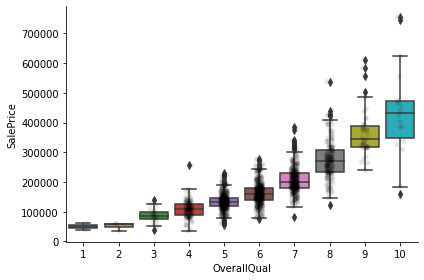

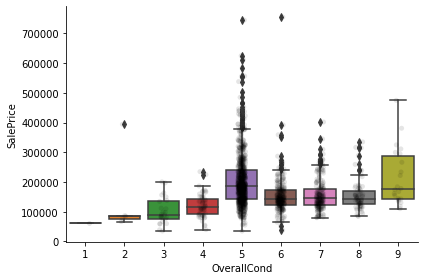

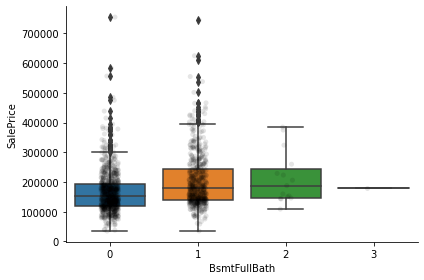

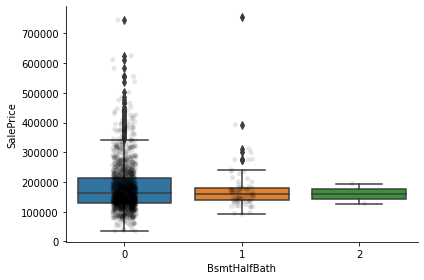

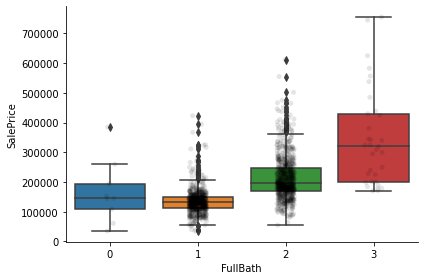

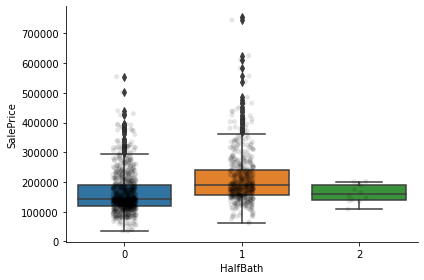

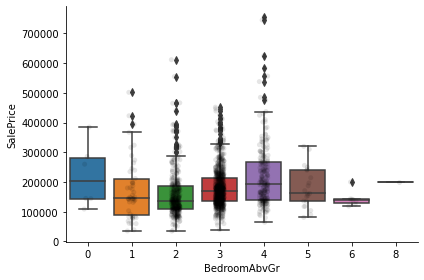

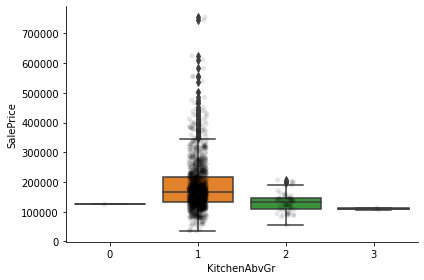

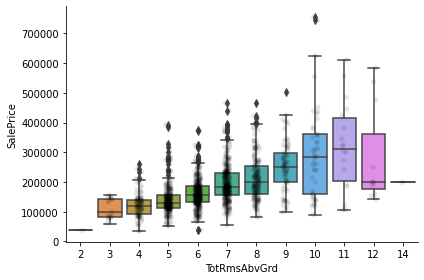

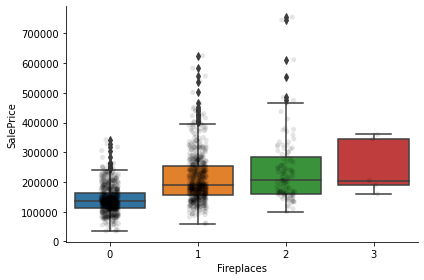

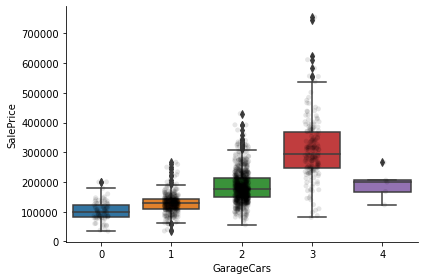

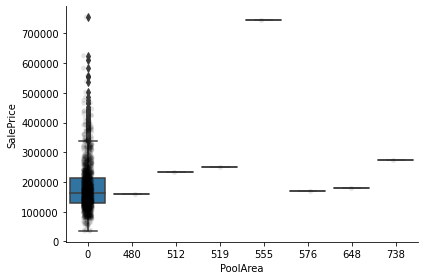

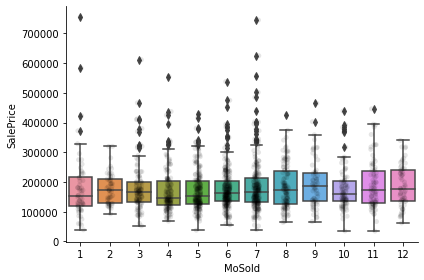

In [69]:
for var in discrete_vars:
    
    # Boxplots
    sns.catplot(x=var,
                y='SalePrice',
                data = data,
                kind='box',
                height=4,
                aspect=1.5)
    
    # Add datapoints on the boxplot (to shown distribution of data better) using stripplot
    sns.stripplot(x=var,
                  y='SalePrice',
                  data=data,
                  jitter=0.1,
                  alpha =0.1,
                  color='k')
    
    plt.show()

**Comments:**
- For most discrete numerical variables, we see an increase in the sale price, with the quality, or overall condition, or  number of rooms, or surface.
- For some variables, we don't see this tendency. Most likely that variable is not a good predictor of sale price.

## Other Categorical Variables
- Number of levels in each variable (cardinality)
- Categorical variables that are related to "house quality"
- Dealing with rare levels

In [70]:
data[cat_vars].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6,15
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,20
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198,536


In [71]:
data[cat_vars].head(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,70
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60


### Number of levels: cardinality
- Let's look at the number of different categories that are present in each of the variables

<AxesSubplot:>

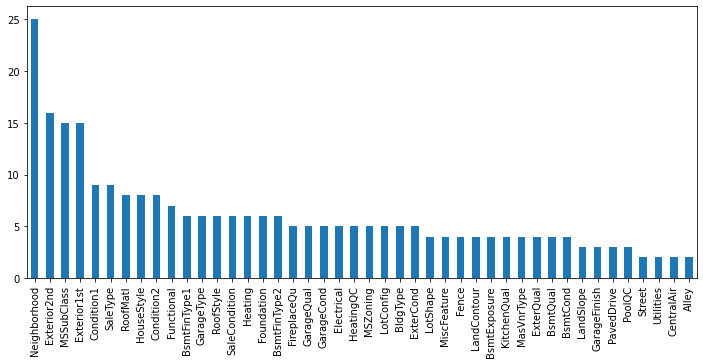

In [72]:
# Count the number of levels with pd.unique(), then plot the count in descending order
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

### Categorical variables related to "quality"
- There are a number of variables that refer to the quality of some aspect of the house, for example the garage, or the fence, or the kitchen. I will replace these categories by numbers increasing with the quality of the place or room.

The mappings can be obtained from the Kaggle Website. One example:

- Ex = Excellent
- Gd = Good
- TA = Average/Typical
- Fa =	Fair
- Po = Poor

Map Po, Fa, etc... with numeric labels instead: 1, 2,...

In [73]:
# dict for labels mapping
qual_mappings={'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

In [74]:
# a list of variables related to quality
qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond']

In [75]:
# apply mapping dict to each qual_var
for var in qual_vars:
    data[var]= data[var].map(qual_mappings)

### In a similar way, re-label other "quality related" categorical variables (encode with integers)

In [76]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_mappings)

In [77]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [78]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data[var] = data[var].map(garage_mappings)

In [79]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_mappings)

In [80]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

## Bivariate analysis of quality-related categorical variables
- Use boxplot to examine relationship between SalePrice and quality-related categorical variables

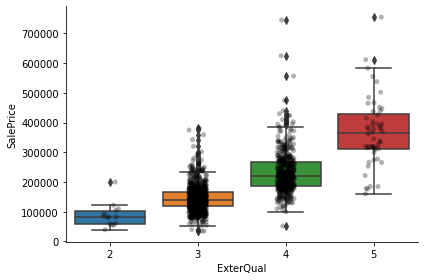

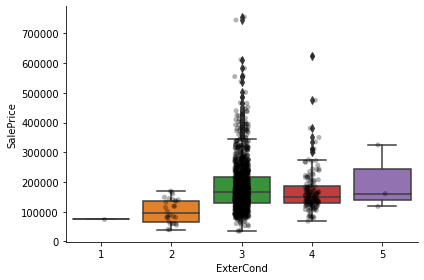

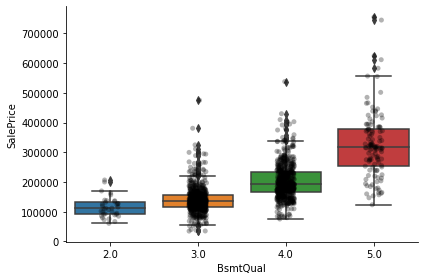

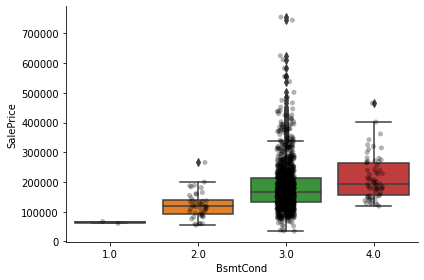

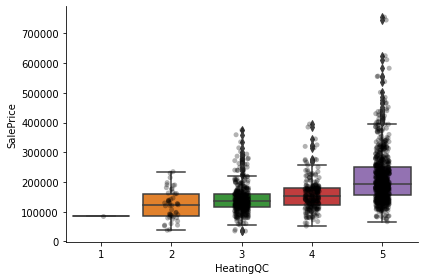

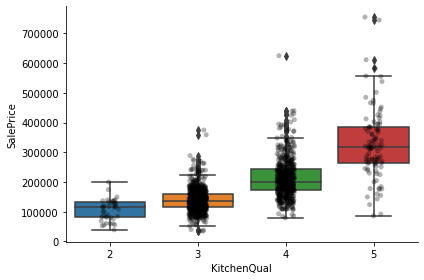

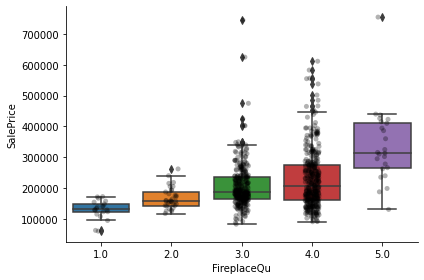

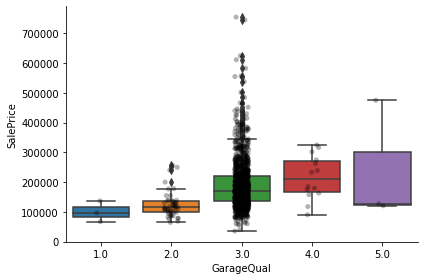

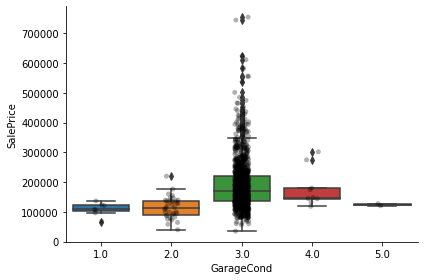

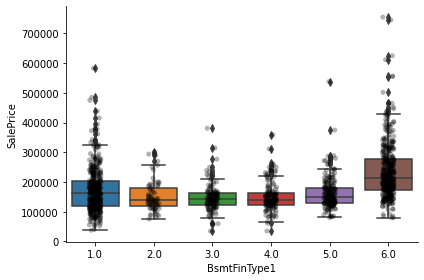

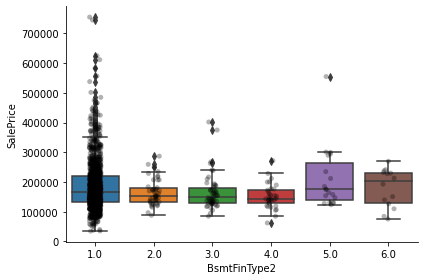

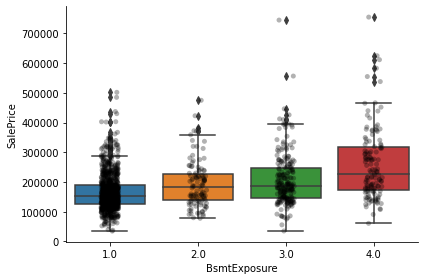

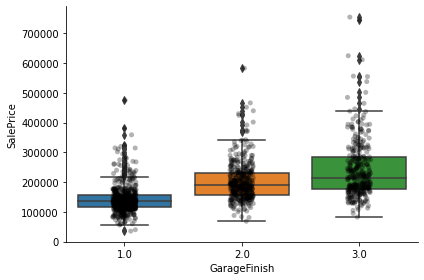

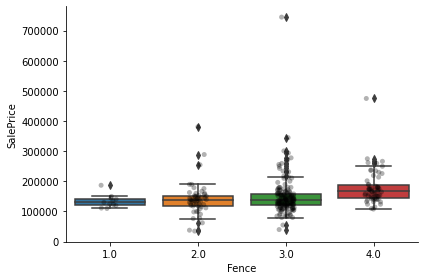

In [81]:
# now let's plot the house mean sale price based on the quality of the 
# various attributes

for var in qual_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most quality-related categorical variables, more quality is associated with higher SalePrice.

In [82]:
# There are some categorical variables whoses labels we did not re-map
cat_others = [var for var in cat_vars if var not in qual_vars]
print(f'There are {len(cat_others)} other categorical variables that are not "quality-related"')

There are 30 other categorical variables that are not "quality-related"


## Rare labels
- Amongst the "other categorical variables", see if some of them has rare labels

In [83]:
def analyse_rare_labels(df,var,rare_perc):
    """ Determine the percetnage of observations per level in a categorical variable.
    Return categories that are 'rare' (defined by categories that have <rare_perc percentage of observations)
        
    Args:
        df(Dataframe): input dataframe
        var(str): name of categorical variable
        rare_perc(numeric): percentage threshold
    
    Returns:
        void
    """
    
    # make a copy of the input dataframe
    df = df.copy()
    
    # determine the % of observations in each categorical of the variable
    tmp = df.groupby(var)[var].count()/len(df)
    
    # return categories that are "rare"
    return tmp[tmp<rare_perc]

In [84]:
for var in cat_others:
    print(analyse_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: MSZoning, dtype: float64

Street
Grvl    0.00411
Name: Street, dtype: float64

Series([], Name: Alley, dtype: float64)

LotShape
IR3    0.006849
Name: LotShape, dtype: float64

Series([], Name: LandContour, dtype: float64)

Utilities
NoSeWa    0.000685
Name: Utilities, dtype: float64

LotConfig
FR3    0.00274
Name: LotConfig, dtype: float64

LandSlope
Sev    0.008904
Name: LandSlope, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: Neighborhood, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: Condition1, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: Condition2, dtype: float64

Series([], Name: BldgType, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: HouseStyle, dtype: float64

RoofStyle
Flat  

**Comments**
- Some of the categorical variables show multiple labels that are present in less than 1% of the houses. 
- Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models, that is why we want to remove them.

Explore the relationship between variables in cat_others and the house sale price:

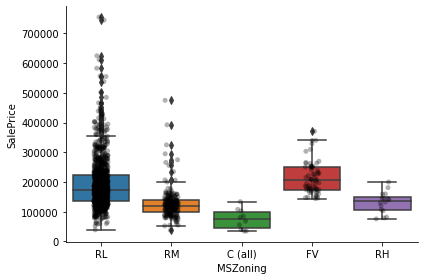

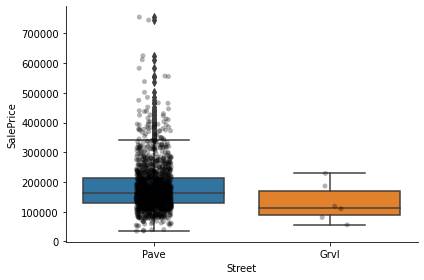

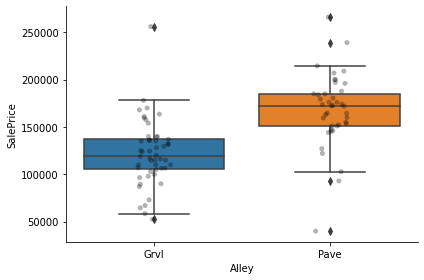

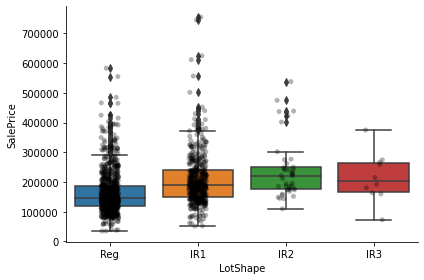

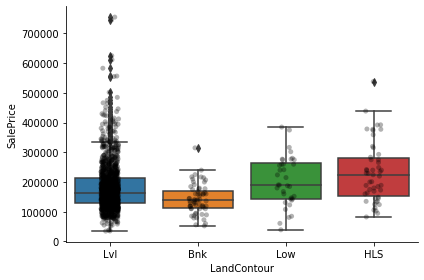

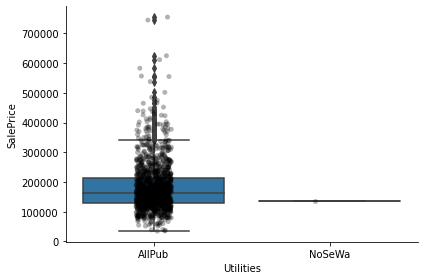

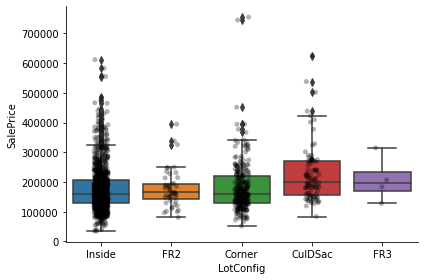

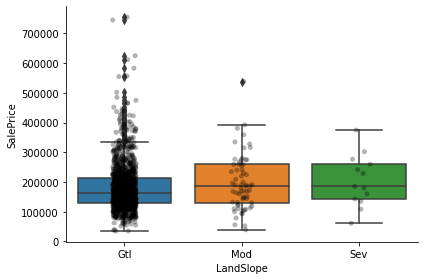

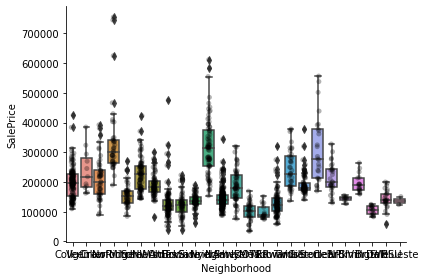

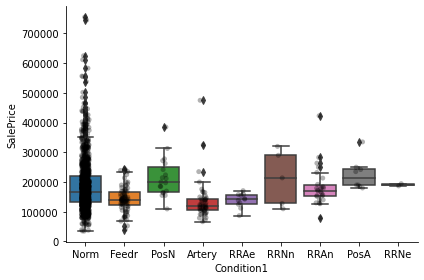

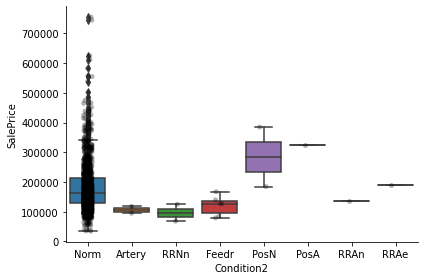

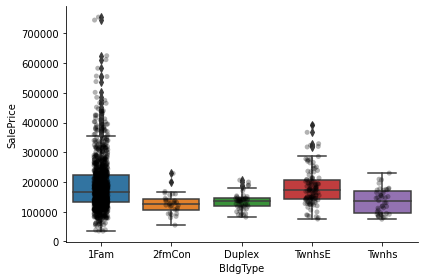

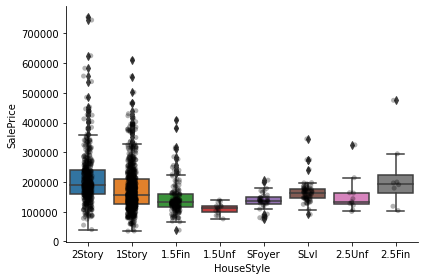

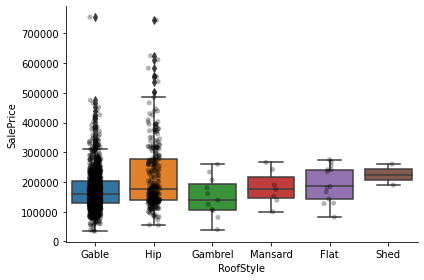

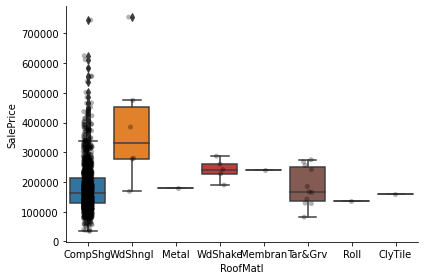

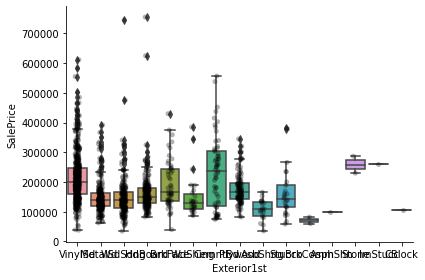

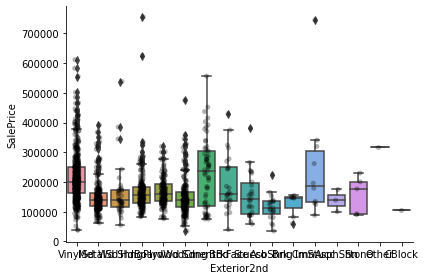

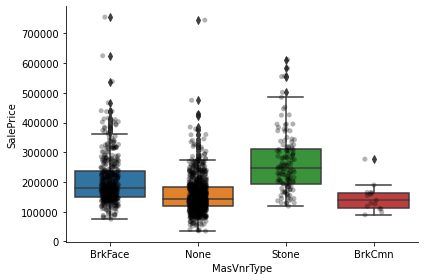

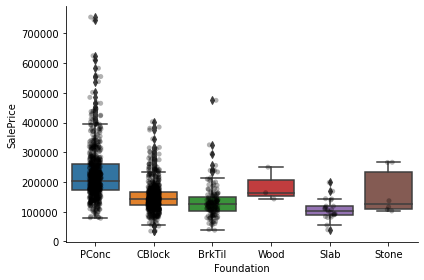

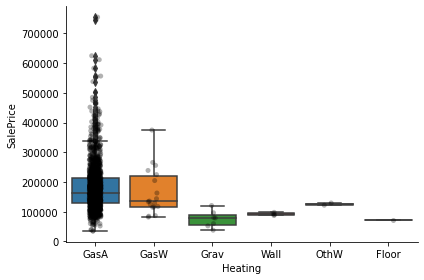

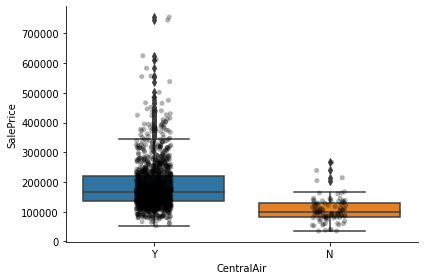

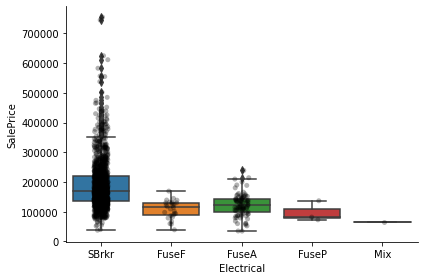

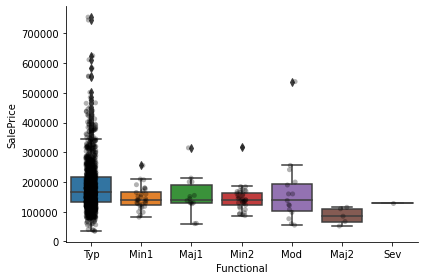

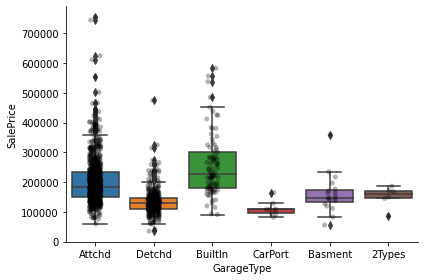

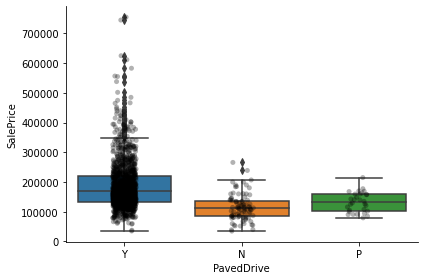

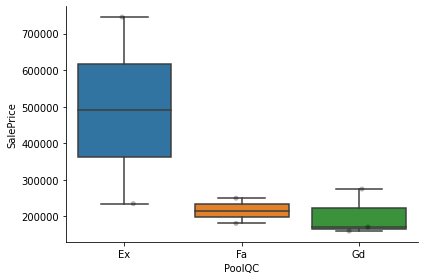

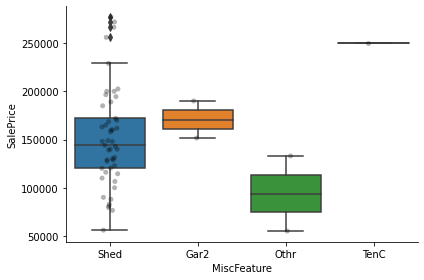

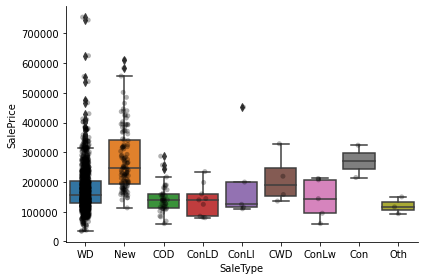

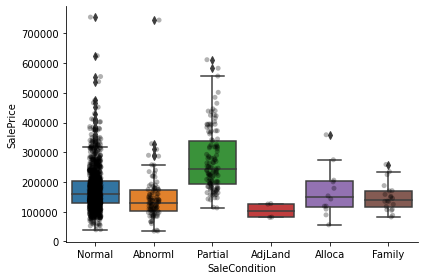

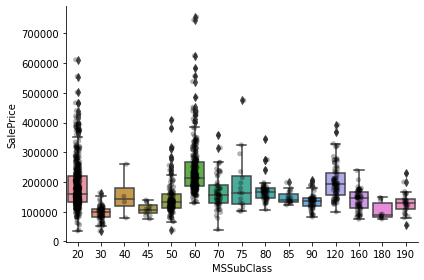

In [85]:
for var in cat_others:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

**Disclaimer:**

There is certainly more that can be done to understand the nature of this data and the relationship of these variables with the response variable: SalePrice.
However, we hope that through this notebook we gave you a flavour of what data analysis looks like.

# Additional Resources

- [Feature Engineering for Machine Learning](https://www.udemy.com/course/feature-engineering-for-machine-learning/?referralCode=A855148E05283015CF06) - Online Course
- [Packt Feature Engineering Cookbook](https://www.packtpub.com/data/python-feature-engineering-cookbook) - Book
- [Predict house price with Feature-engine](https://www.kaggle.com/solegalli/predict-house-price-with-feature-engine) - Kaggle kernel
- [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python) - Kaggle kernel
- [How I made top 0.3% on a Kaggle competition](https://www.kaggle.com/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition) - Kaggle kernel